<a href="https://colab.research.google.com/github/Atharva-Gaykar/Deep_Learning/blob/main/notebooks/tabular_data/Severity_Score_PRE_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

## 🧠 Through this project: Severity Score Prediction using ANN (Regression Task)

* I built an **Artificial Neural Network (ANN)** to predict **continuous severity scores**, making it a **regression problem**.
* The dataset contained **numeric features** and **target scores** indicating the severity level (e.g., of a disease, condition, or risk).
* Preprocessed the dataset by:

  * **Handling missing values**
  * **Normalizing** the features (using StandardScaler/MinMaxScaler) to stabilize ANN training
* Designed a feed-forward neural network using **Dense layers**, **ReLU activation**, and **Dropout** for regularization.
* Used a **single neuron with linear activation** in the output layer to predict continuous values.
* Trained the model using:

  * **Mean Squared Error (MSE)** as the loss function
  * **Adam optimizer** for efficient weight updates
* Evaluated model performance using:

  * **Mean Absolute Error (MAE)**
  * **Root Mean Squared Error (RMSE)**
  * **R² Score** to measure how well the model explains variance
* Tuned hyperparameters like **learning rate, batch size, epochs**, and number of **hidden units/layers** to improve accuracy.
* Understood how regression tasks differ from classification and how ANN can be adapted accordingly.

---



ACTIVATION FUNCTION-LINEAR

LOSS FUNCTION



---

## 📉 Loss Functions Used in Regression

### 🔹 **1. Mean Squared Error (MSE)**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* Measures the **average of the squared differences** between actual ($y_i$) and predicted ($\hat{y}_i$) values.
* Penalizes **larger errors more heavily** due to the square.
* Commonly used in regression tasks to emphasize significant prediction errors.

---

### 🔹 **2. Mean Absolute Error (MAE)**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

* Measures the **average of the absolute differences** between actual and predicted values.
* Provides a **more interpretable** measure of average prediction error.
* Less sensitive to outliers compared to MSE.

---

> 🔍 **When to use what?**

* Use **MSE** when large errors are especially undesirable (e.g., medical dosage predictions).
* Use **MAE** for a more **robust, general-purpose** regression loss that tolerates outliers better.

---



OPTIMIZER USED ADAM

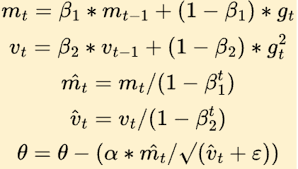

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

raw_dt=pd.read_csv("/content/drive/MyDrive/global_cancer_patients_2015_2024.csv")
raw_dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [ ]:
raw_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:


raw_dt.drop('Patient_ID', axis=1, inplace=True)

In [ ]:
raw_dt

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


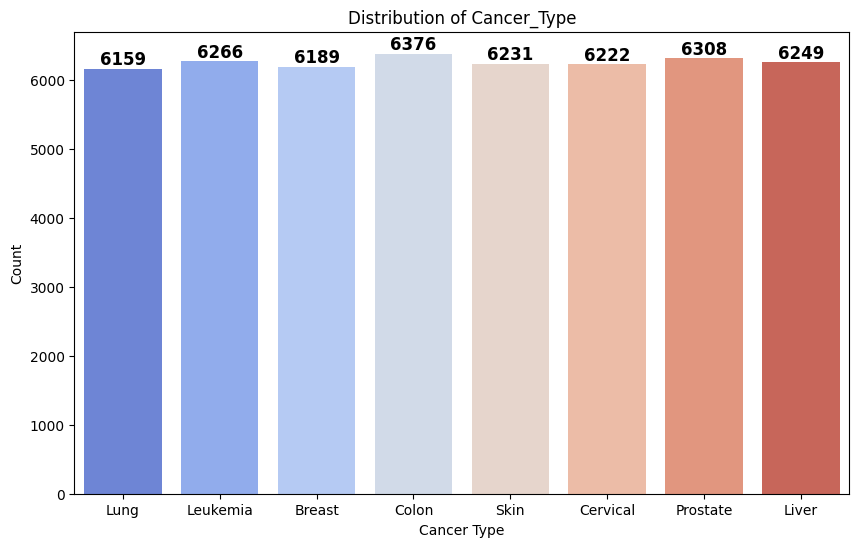

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=raw_dt, x='Cancer_Type', palette='coolwarm')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')


plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Distribution of Cancer_Type')

plt.show()

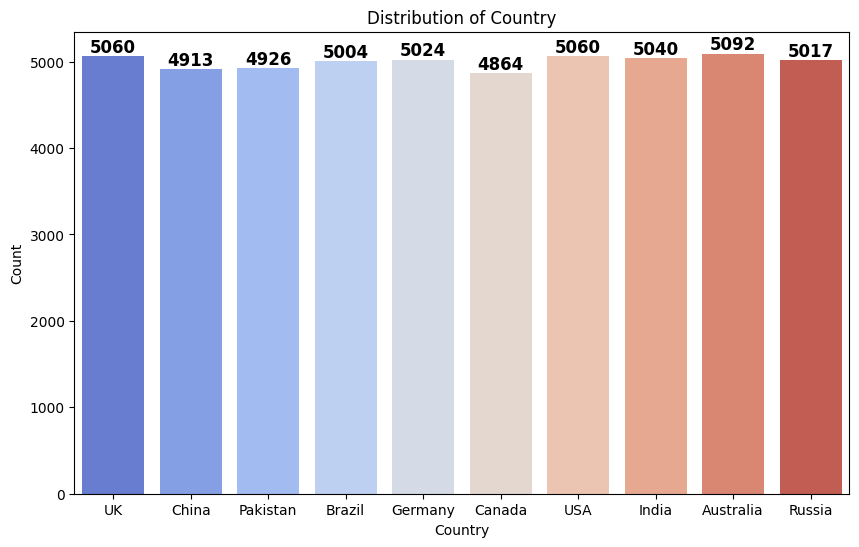

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=raw_dt, x='Country_Region', palette='coolwarm')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')


plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')

plt.show()

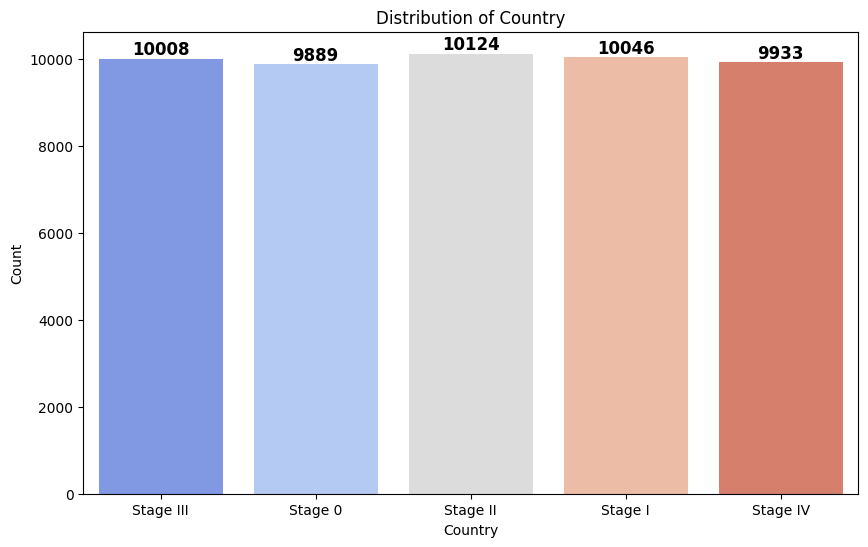

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=raw_dt, x='Cancer_Stage', palette='coolwarm')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')


plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')

plt.show()

In [ ]:
raw_dt['Year'].value_counts()


,count
Year,
2016,5094
2020,5079
2019,5065
2017,5037
2015,5012
2024,4994
2021,4967
2018,4936
2023,4935


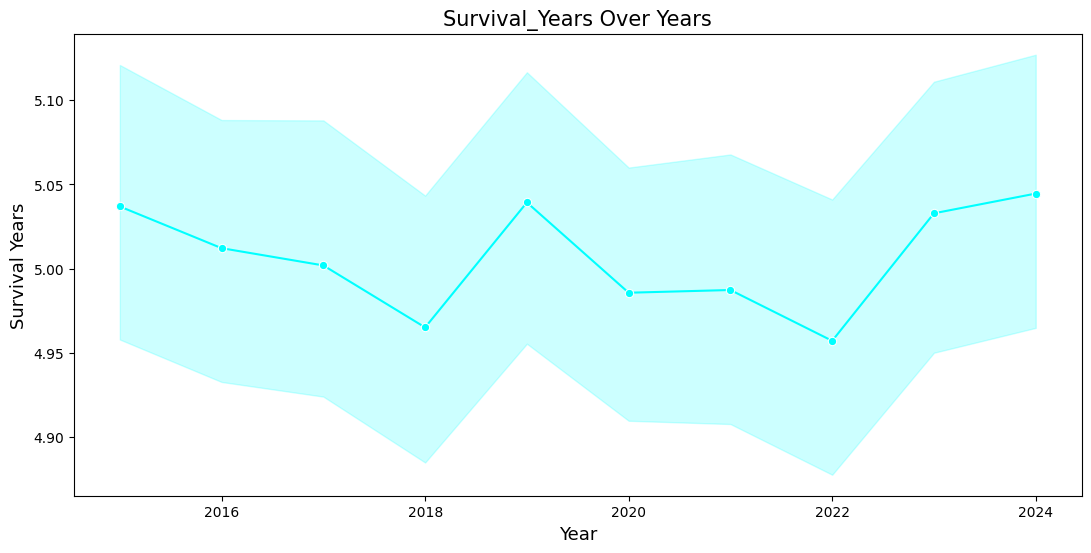

In [ ]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=raw_dt['Year'], y=raw_dt['Survival_Years'], marker='o', color='cyan')
plt.title('Survival_Years Over Years', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Survival Years', fontsize=13)
plt.show()

Year alone as a basis for a train-test split isn't always appropriate, as our data shows time-based trends or seasonality, which seems to be the case here.

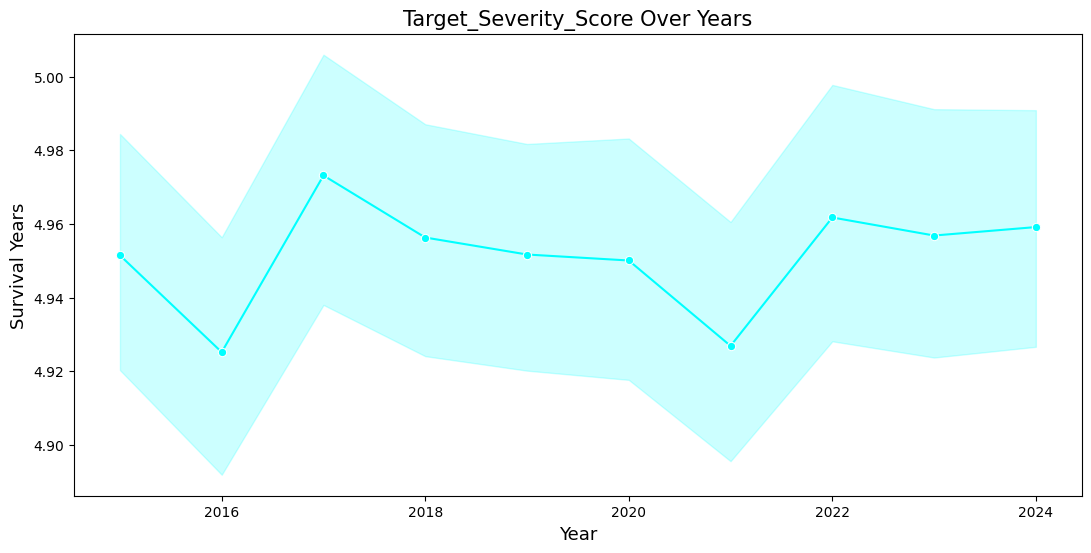

In [ ]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=raw_dt['Year'], y=raw_dt['Target_Severity_Score'], marker='o', color='cyan')
plt.title('Target_Severity_Score Over Years', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Survival Years', fontsize=13)
plt.show()

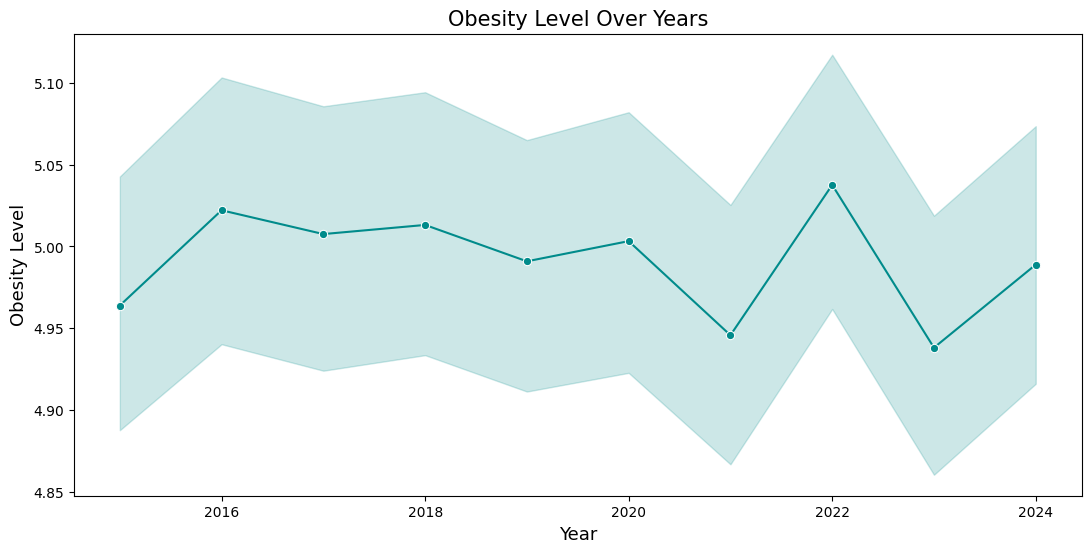

In [ ]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=raw_dt['Year'], y=raw_dt['Obesity_Level'], marker='o', color='darkcyan')
plt.title('Obesity Level Over Years', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Obesity Level', fontsize=13)
plt.show()

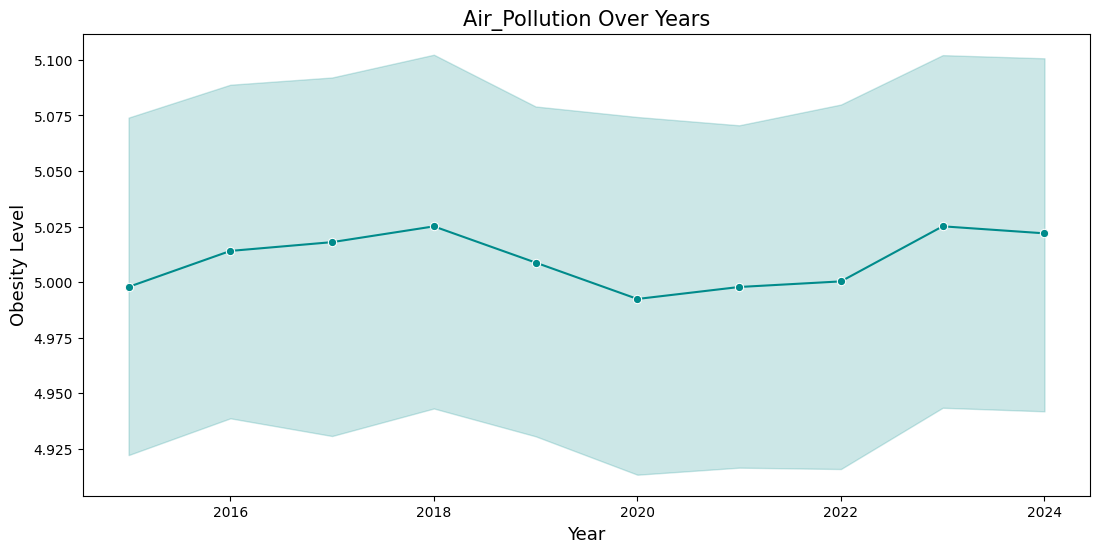

In [ ]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=raw_dt['Year'], y=raw_dt['Air_Pollution'], marker='o', color='darkcyan')
plt.title('Air_Pollution Over Years', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Obesity Level', fontsize=13)
plt.show()

In [ ]:
raw_dt['Year']=pd.to_datetime(raw_dt['Year'], format='%Y').dt.year
raw_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Country_Region         50000 non-null  object 
 3   Year                   50000 non-null  int32  
 4   Genetic_Risk           50000 non-null  float64
 5   Air_Pollution          50000 non-null  float64
 6   Alcohol_Use            50000 non-null  float64
 7   Smoking                50000 non-null  float64
 8   Obesity_Level          50000 non-null  float64
 9   Cancer_Type            50000 non-null  object 
 10  Cancer_Stage           50000 non-null  object 
 11  Treatment_Cost_USD     50000 non-null  float64
 12  Survival_Years         50000 non-null  float64
 13  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8), int32(1), int64(1), object(4)
memory us

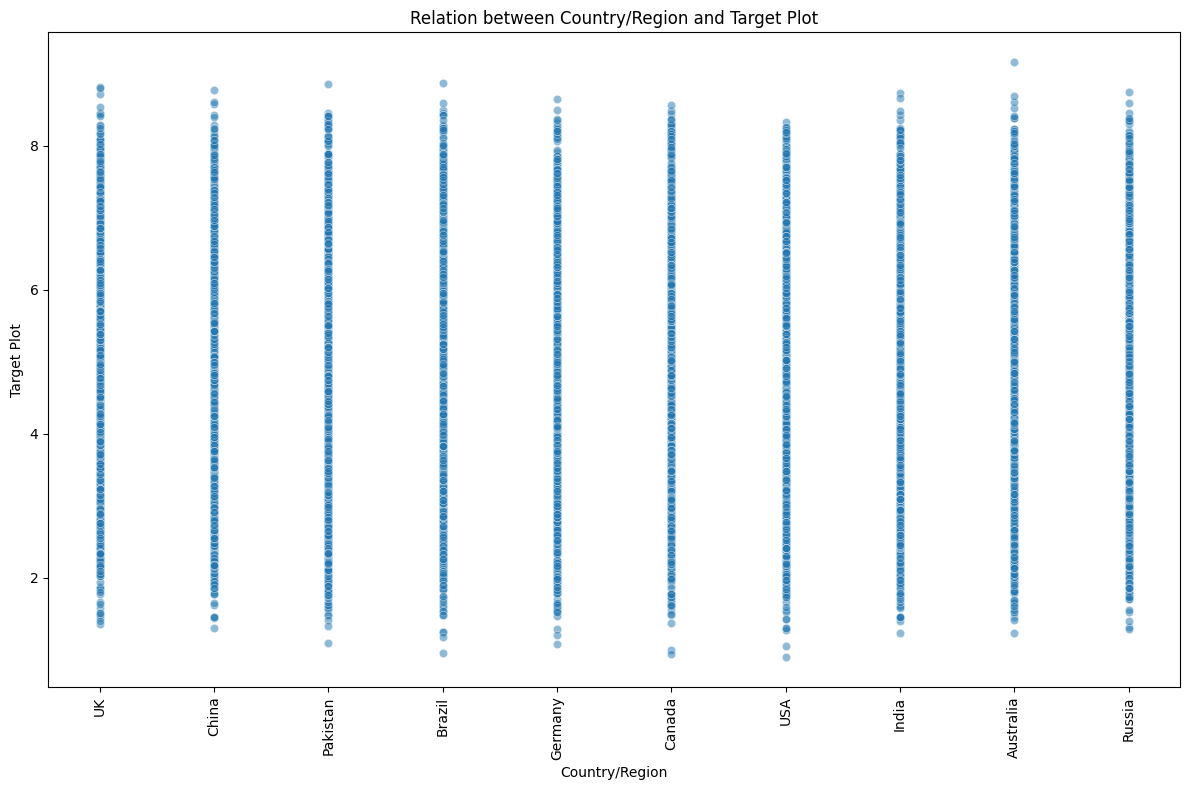

In [ ]:


plt.figure(figsize=(12, 8))
sns.scatterplot(data=raw_dt, x='Country_Region', y='Target_Severity_Score', alpha=0.5)
plt.title('Relation between Country/Region and Target Plot')
plt.xlabel('Country/Region')
plt.ylabel('Target Plot')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

raw_dt.drop('Country_Region', axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split


X = raw_dt.drop('Target_Severity_Score', axis=1)
y = raw_dt['Target_Severity_Score']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (30000, 12)
Validation set shape: (10000, 12)
Testing set shape: (10000, 12)


In [ ]:
X_train

,Age,Gender,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years
18306,78,Female,2017,6.5,6.9,2.2,3.9,8.8,Skin,Stage III,57802.90,7.8
49528,74,Female,2018,6.9,2.6,9.2,5.9,9.6,Skin,Stage I,84642.84,9.1
44745,61,Male,2024,7.6,7.3,4.2,9.6,5.0,Liver,Stage II,25349.79,5.9
46827,64,Male,2019,6.6,6.7,9.4,7.7,3.3,Breast,Stage II,6940.37,0.8
27531,28,Female,2016,7.0,5.7,6.2,8.6,4.5,Breast,Stage I,18033.43,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,41,Male,2023,7.7,7.4,3.2,2.2,8.9,Cervical,Stage I,36719.37,5.3
44732,62,Other,2024,0.6,5.3,6.4,7.8,1.7,Cervical,Stage II,67422.76,0.3
38158,25,Female,2015,7.5,4.3,4.4,7.3,4.0,Colon,Stage III,84450.46,1.9
860,24,Male,2023,5.8,1.1,8.7,4.2,8.3,Lung,Stage I,35354.69,5.5


In [ ]:
X_train['Gender'].value_counts()

,count
Gender,
Female,10079
Male,10062
Other,9859


In [ ]:


numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", numerical_cols)


categorical_cols = X_train.select_dtypes(include=np.object_).columns.tolist()
print("Categorical columns:", categorical_cols)

Numerical columns: ['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']
Categorical columns: ['Gender', 'Cancer_Type', 'Cancer_Stage']


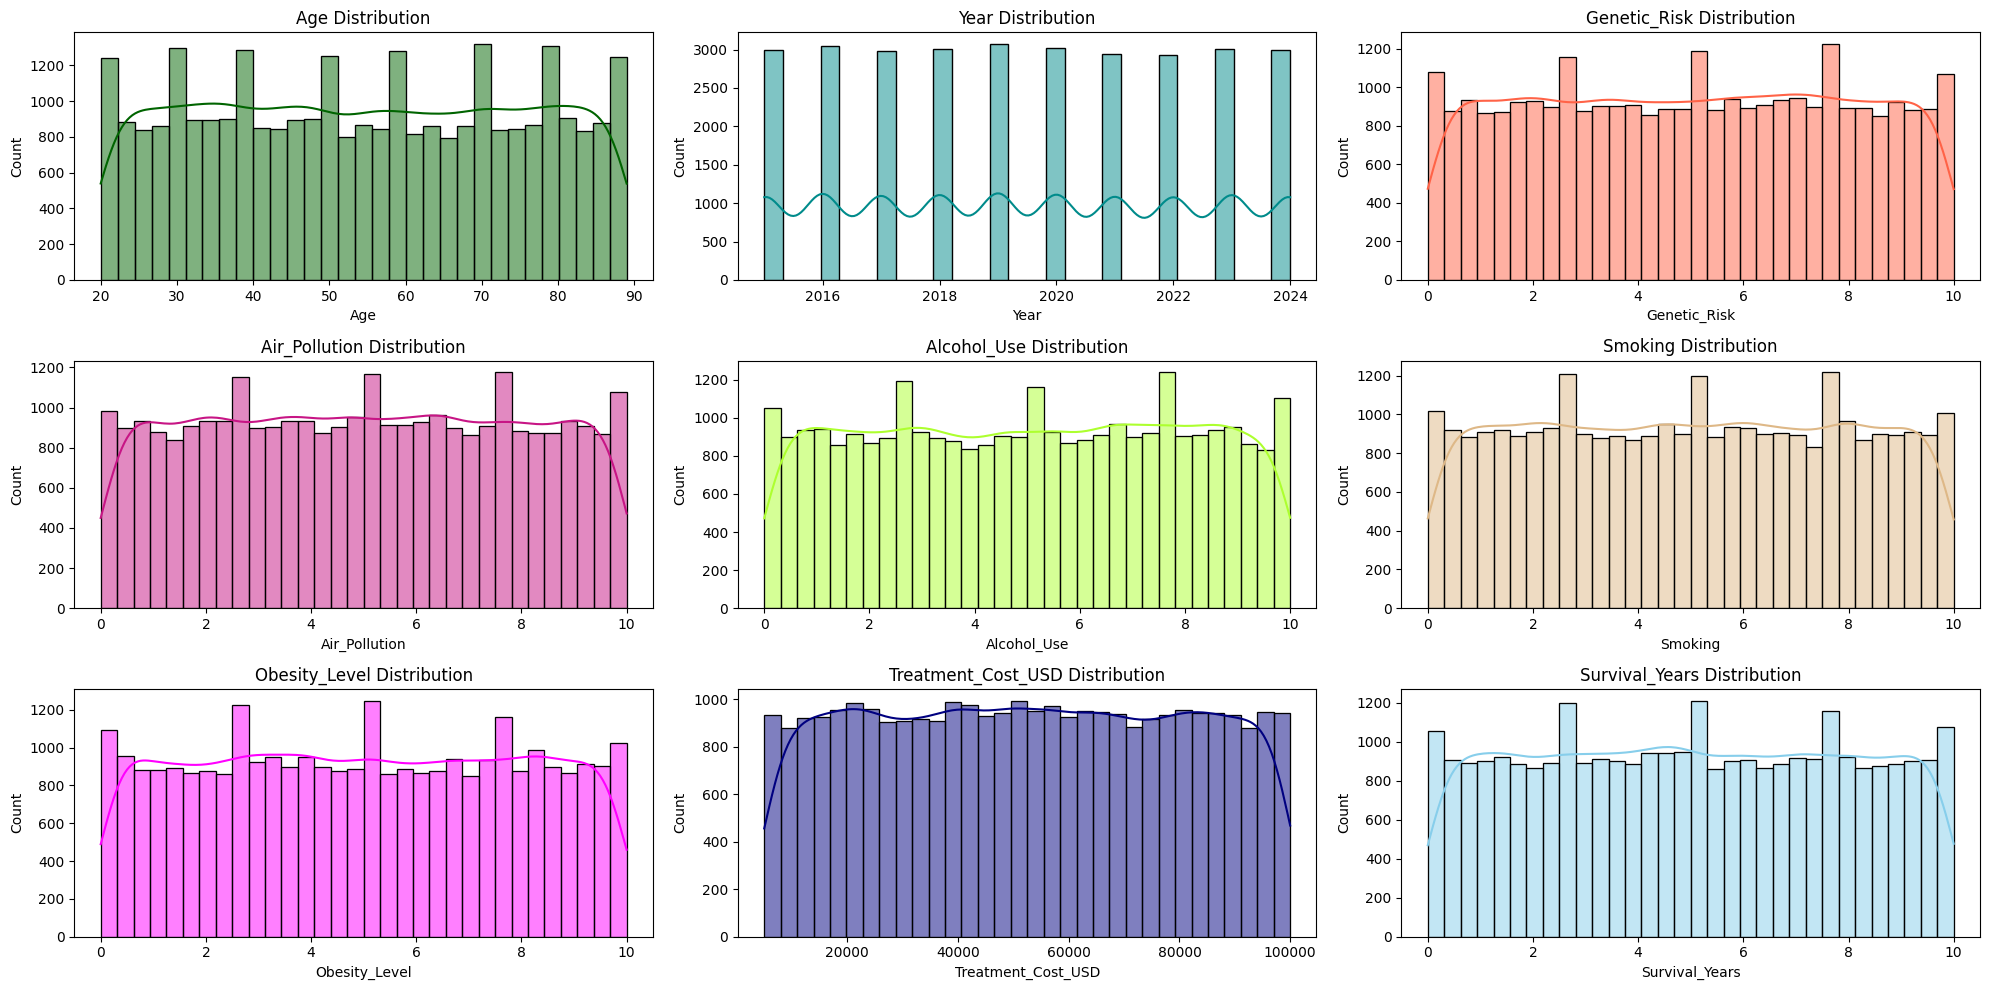

In [ ]:
plt.figure(figsize=(20,10))
colors=['darkgreen','darkcyan','tomato','mediumvioletred','greenyellow','burlywood','fuchsia','navy','skyblue']
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(X_train,x=col,kde=True,color=colors[i])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [ ]:
analysis_corr=pd.concat([X_train[numerical_cols],y_train],axis=1)
analysis_corr.corr()['Target_Severity_Score'].sort_values(ascending=False)

,Target_Severity_Score
Target_Severity_Score,1.000000
Smoking,0.483705
Genetic_Risk,0.480333
Alcohol_Use,0.366858
Air_Pollution,0.363770
Obesity_Level,0.249268
Year,0.002676
Age,0.002142
Survival_Years,0.001022
Treatment_Cost_USD,-0.471689


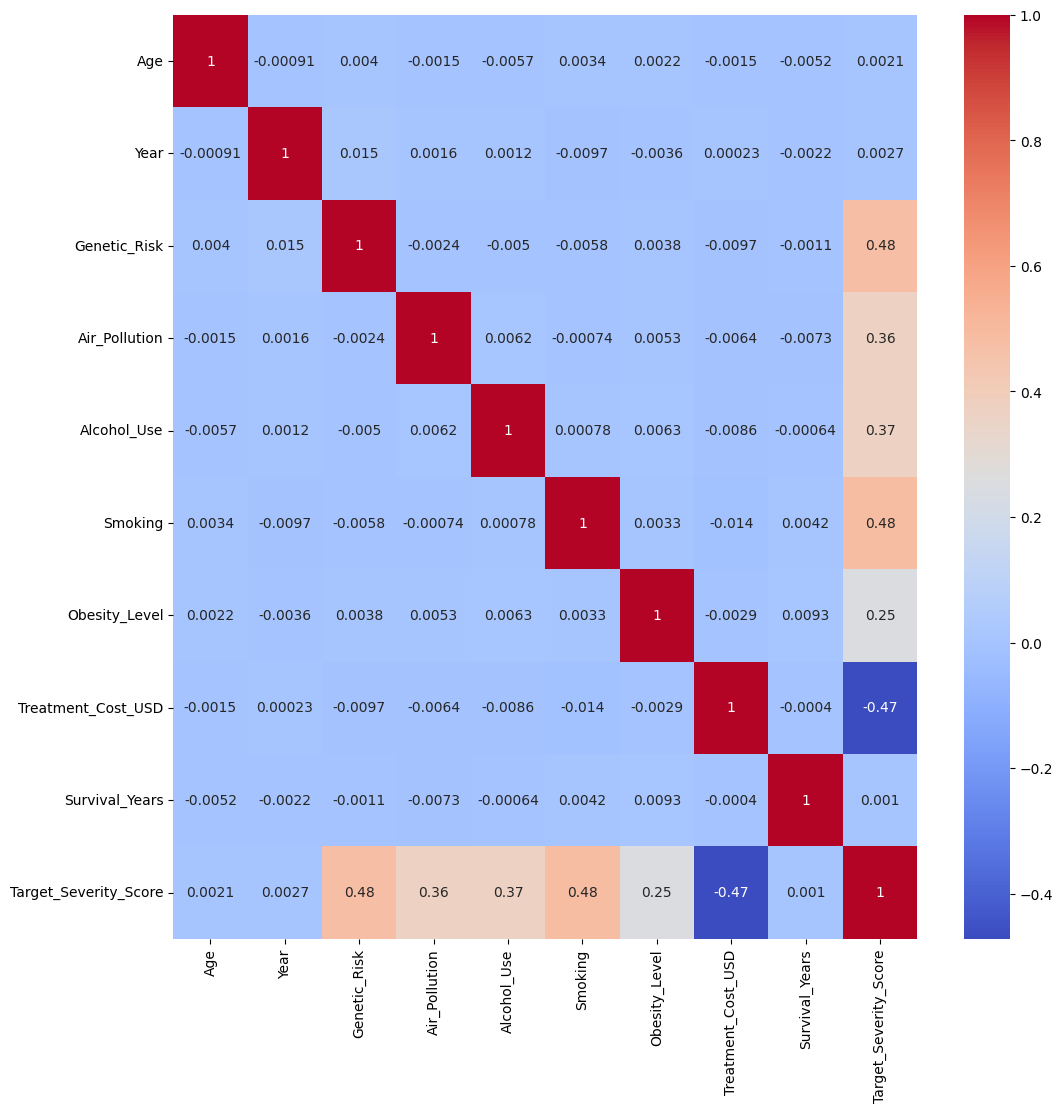

In [ ]:
corr = analysis_corr.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:

X_train = X_train.drop('Year', axis=1)
X_val = X_val.drop('Year', axis=1)
X_test = X_test.drop('Year', axis=1)
numerical_cols.remove('Year')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

cancer_stage_order = [raw_dt['Cancer_Stage'].unique().tolist()]

transformer = ColumnTransformer(transformers=[
    ('minmax', MinMaxScaler(), numerical_cols),
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Cancer_Type']),
    ('ordinal', OrdinalEncoder(categories=cancer_stage_order), ['Cancer_Stage']),
], remainder='passthrough')
X_train_transformed = transformer.fit_transform(X_train)
X_val_transformed = transformer.transform(X_val)
X_test_transformed = transformer.transform(X_test)

print("Shape of transformed training data:", X_train_transformed.shape)
print("Shape of transformed validation data:", X_val_transformed.shape)
print("Shape of transformed testing data:", X_test_transformed.shape)

Shape of transformed training data: (30000, 20)
Shape of transformed validation data: (10000, 20)
Shape of transformed testing data: (10000, 20)




---

## 🔢 **MinMaxScaler() – Formula and Explanation**

**MinMaxScaler** scales features to a fixed range, typically $[0, 1]$. This helps models converge faster and ensures that all input features contribute equally.

### 🔹 **Formula:**

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Where:

* $X$ = original feature value
* $X_{\text{min}}$ = minimum value in the feature
* $X_{\text{max}}$ = maximum value in the feature

✅ **Effect**: Scales every feature such that:

$$
X_{\text{scaled}} \in [0, 1]
$$

> This is useful for algorithms like neural networks that are sensitive to feature scale.

---

## 🏷️ **Ordinal Encoding for Hierarchical Categorical Data**

### 🔹 What is Ordinal Encoding?

**Ordinal encoding** converts **categorical values** into **integer values** based on their **natural order or hierarchy**.

### 🔹 When is it used?

When the categories have a **meaningful order**, such as:

* Education: `High School < Bachelor < Master < PhD`
* Severity: `Low < Medium < High < Critical`
* Rank: `Junior < Mid < Senior < Lead`

### 🔹 How it works (Example):

| Category | Encoded Value |
| -------- | ------------- |
| Low      | 0             |
| Medium   | 1             |
| High     | 2             |
| Critical | 3             |

✅ This helps models understand the **relative level** or importance of categories.



In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import ReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import LeakyReLU, PReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Activation,
    LeakyReLU, PReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

Absolutely! Here's a **clear explanation and math breakdown** of the key components used in your ANN code — especially:

* **L2 regularization**
* **Dropout**
* **ReLU activation function**

Formatted perfectly for a Colab **markdown text cell**:

---

## 🧮 Key Concepts in the Model Architecture

### 🔹 **1. L2 Regularization (Weight Decay)**

L2 regularization helps reduce overfitting by **penalizing large weight values** during training.

$$
\text{L2 Loss} = \lambda \sum_{j} w_j^2
$$

Where:

* $w_j$ = individual weights in the network
* $\lambda$ = regularization strength (in your code: `l2_reg=0.002`)

✅ This term is added to the total loss, encouraging the model to keep weights **small and smooth**, which improves generalization.

---

### 🔹 **2. Dropout**

Dropout randomly **disables a fraction of neurons** during training to prevent co-adaptation of neurons.

$$
\text{Dropout Rate} = p
$$

Where:

* $p$ = fraction of neurons to "drop" (set to zero) during each training step
* In your code: `dropout_rate` is a user-defined parameter (e.g., 0.3 means 30% of neurons dropped)

✅ Helps in **regularization** by introducing randomness and reducing dependency on specific nodes.

---

### 🔹 **3. ReLU Activation Function**

ReLU (**Rectified Linear Unit**) is a non-linear activation used to introduce non-linearity in the network:

$$
\text{ReLU}(x) = \max(0, x)
$$

* Outputs zero if the input is negative, else passes it through unchanged.
* Commonly used due to **simplicity** and efficient gradient flow.

#### Variants used in your code:

* `LeakyReLU(α=0.01)`:

  $$
  \text{LeakyReLU}(x) =
  \begin{cases}
    x, & \text{if } x > 0 \\
    \alpha x, & \text{if } x \leq 0
  \end{cases}
  $$

  Allows a small gradient ($\alpha$) when $x \leq 0$ to prevent dying neurons.

* `PReLU`: Parametric ReLU — similar to LeakyReLU, but **learns α** during training.





In [ ]:
def create_model(layers, input_dim, dropout_rate, n_classes, activation="leakyrelu",
                learning_rate=0.01, l2_reg=0.002):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=input_dim,
                          kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        else:
            model.add(Dense(nodes, kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))

        model.add(BatchNormalization())


        if activation == "prelu":
            model.add(PReLU())
        elif activation == "leakyrelu":
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Activation(activation))

        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(n_classes, activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                 metrics=['mae', 'mse'])
    return model



---

## ⚙️ Weight Initialization Techniques in Deep Learning

Proper weight initialization improves **convergence speed** and **training stability**.
---

### 🔹 **1. He Uniform Initialization** (`HeUniform()`)

* Designed for **ReLU/LeakyReLU/PReLU** activations.
* Samples weights from a **uniform distribution**:

$$
W \sim \mathcal{U} \left( -\sqrt{\frac{6}{n_{\text{in}}}}, \sqrt{\frac{6}{n_{\text{in}}}} \right)
$$

Where:

* $n_{\text{in}}$ = number of input units to the neuron
* Maintains variance across layers for ReLU-type activations



---




In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = create_model(layers=[20], input_dim=X_train_transformed.shape[1], dropout_rate=0.0, n_classes=1,
                     activation="relu", learning_rate=0.001, l2_reg=0.001)

history = model.fit(X_train_transformed, y_train,
                    validation_data=(X_val_transformed, y_val),
                    epochs=20,
                    batch_size=128,
                    verbose=1,


                    callbacks=[early_stopping],
                   )

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 21.8409 - mae: 4.3885 - mse: 21.7987 - val_loss: 4.6535 - val_mae: 1.9553 - val_mse: 4.6113
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5409 - mae: 1.6452 - mse: 3.4986 - val_loss: 0.3988 - val_mae: 0.4876 - val_mse: 0.3567
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4285 - mae: 0.5042 - mse: 0.3866 - val_loss: 0.2937 - val_mae: 0.4079 - val_mse: 0.2530
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2641 - mae: 0.3818 - mse: 0.2239 - val_loss: 0.1862 - val_mae: 0.3100 - val_mse: 0.1474
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1819 - mae: 0.3030 - mse: 0.1437 - val_loss: 0.1399 - val_mae: 0.2609 - val_mse: 0.1032
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1415 - mae: 0.2587 - mse: 0.1054 - val_loss: 0.0977 - val_mae: 0.2022 - val_mse: 0.0632
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1157 - mae: 0.2269 - mse: 0.0817 - 

In [ ]:
y_pred = model.predict(X_test_transformed)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")


MAE  = 0.0485
RMSE = 0.0670
R²   = 0.9969


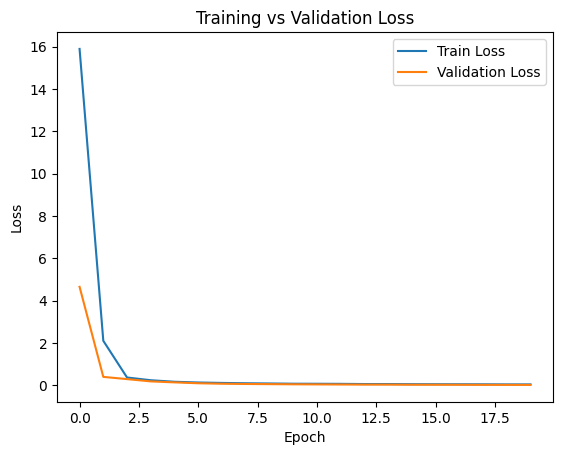

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


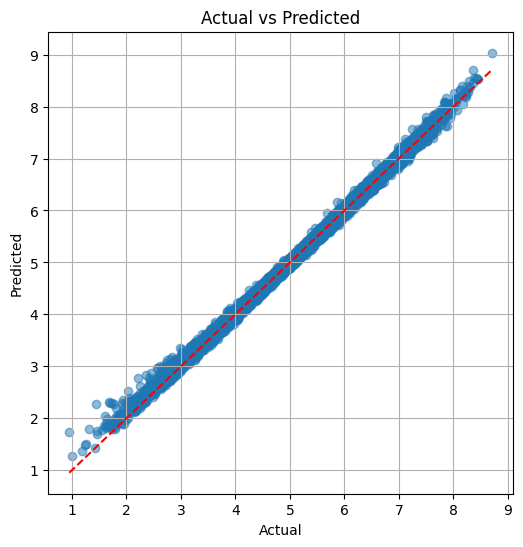

In [ ]:


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()



---

### 🔹 **3. R² Score (Coefficient of Determination)**

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

Where:

* $y_i$ = actual value
* $\hat{y}_i$ = predicted value
* $\bar{y}$ = mean of actual values
* $n$ = number of data points

---

### ✅ Interpretation:

* **R² score** measures how well the model explains the **variance** in the target variable.
* Values range from:

  * **1.0** → perfect predictions
  * **0.0** → model is no better than the mean
  * **< 0.0** → model is worse than the baseline (mean prediction)

---

> 🔍 A higher R² indicates a **better fit** of the model to the data. It’s useful for evaluating the **overall effectiveness** of a regression model.

---

